In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [2]:

predata_df = pd.read_csv('file-2.csv')
print(predata_df.head(5))


                                           sentences  sentiment_tag
0   Enjoying a beautiful day at the park!        ...              1
1   Traffic was terrible this morning.           ...              0
2   Just finished an amazing workout! 💪          ...              1
3   Excited about the upcoming weekend getaway!  ...              1
4   Feeling grateful for the little things in lif...              1


In [3]:
import nltk
from nltk.corpus import stopwords

# nltk stopwords indir
nltk.download('stopwords')

# Türkçe stopword'leri al
stopwords = set(stopwords.words('english'))

print("Num of count: ",len(stopwords))


Num of count:  198


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Yeni stopwords eklemek için custom_stopwords listesi oluştur
custom_stopwords = ['rt', 'amp', 'http', 'https', 'co', 'com', 'im']  # eklemek istediğiniz kelimeleri buraya yazın

# Mevcut stopwords'e yeni kelimeleri ekle
stopwords.update(custom_stopwords)

# Kontrol etmek için
print("Toplam stopwords sayısı:", len(stopwords))


Toplam stopwords sayısı: 205


In [5]:
import string

def preprocess_text(text, stopwords):
    # Küçük harfe çevir
    text = text.lower()
    # Noktalama işaretlerini kaldır
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Stopwords'leri temizle
    processed_text = ' '.join([word for word in text.split() if word not in stopwords])
    return processed_text



In [8]:
# Örnek kullanım
predata_df['processed_sentence'] = predata_df['sentences'].apply(lambda x: preprocess_text(x, stopwords) if isinstance(x, str) else "")
print(predata_df[['sentences', 'processed_sentence']].head(5))

                                           sentences  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Feeling grateful for the little things in lif...   

                    processed_sentence  
0          enjoying beautiful day park  
1             traffic terrible morning  
2           finished amazing workout 💪  
3     excited upcoming weekend getaway  
4  feeling grateful little things life  


In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(predata_df['processed_sentence'])

# Tokenize edilmiş kelimeleri görmek için:
# print(vectorizer.get_feature_names_out())

In [12]:
predata_df = predata_df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X[:10000], predata_df['sentiment_tag'][:10000], test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8000
Test set size: 2000


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Modelleri bir sözlükte tanımla
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Modelleri eğit ve sonuçları sakla
trained_models = {}
for model_name, model in models.items():
    print(f"Eğitiliyor: {model_name}")
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    print(f"{model_name} eğitildi.\n")

Eğitiliyor: Naive Bayes
Naive Bayes eğitildi.

Eğitiliyor: Logistic Regression
Logistic Regression eğitildi.

Eğitiliyor: Decision Tree
Decision Tree eğitildi.

Eğitiliyor: Random Forest
Random Forest eğitildi.



In [18]:
# Modelleri test et ve sonuçları yazdır
for model_name, model in trained_models.items():
    print(f"Model: {model_name}")
    
    # Tahmin yap
    y_pred = model.predict(X_test)
    
    # Accuracy score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Naive Bayes
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       999
           1       0.49      0.47      0.48      1001

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

Model: Logistic Regression
Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       999
           1       0.52      0.52      0.52      1001

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.52      0.51      2000

Model: Decision Tree
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       999
           1       0.49      0.49      0.49      1001

 

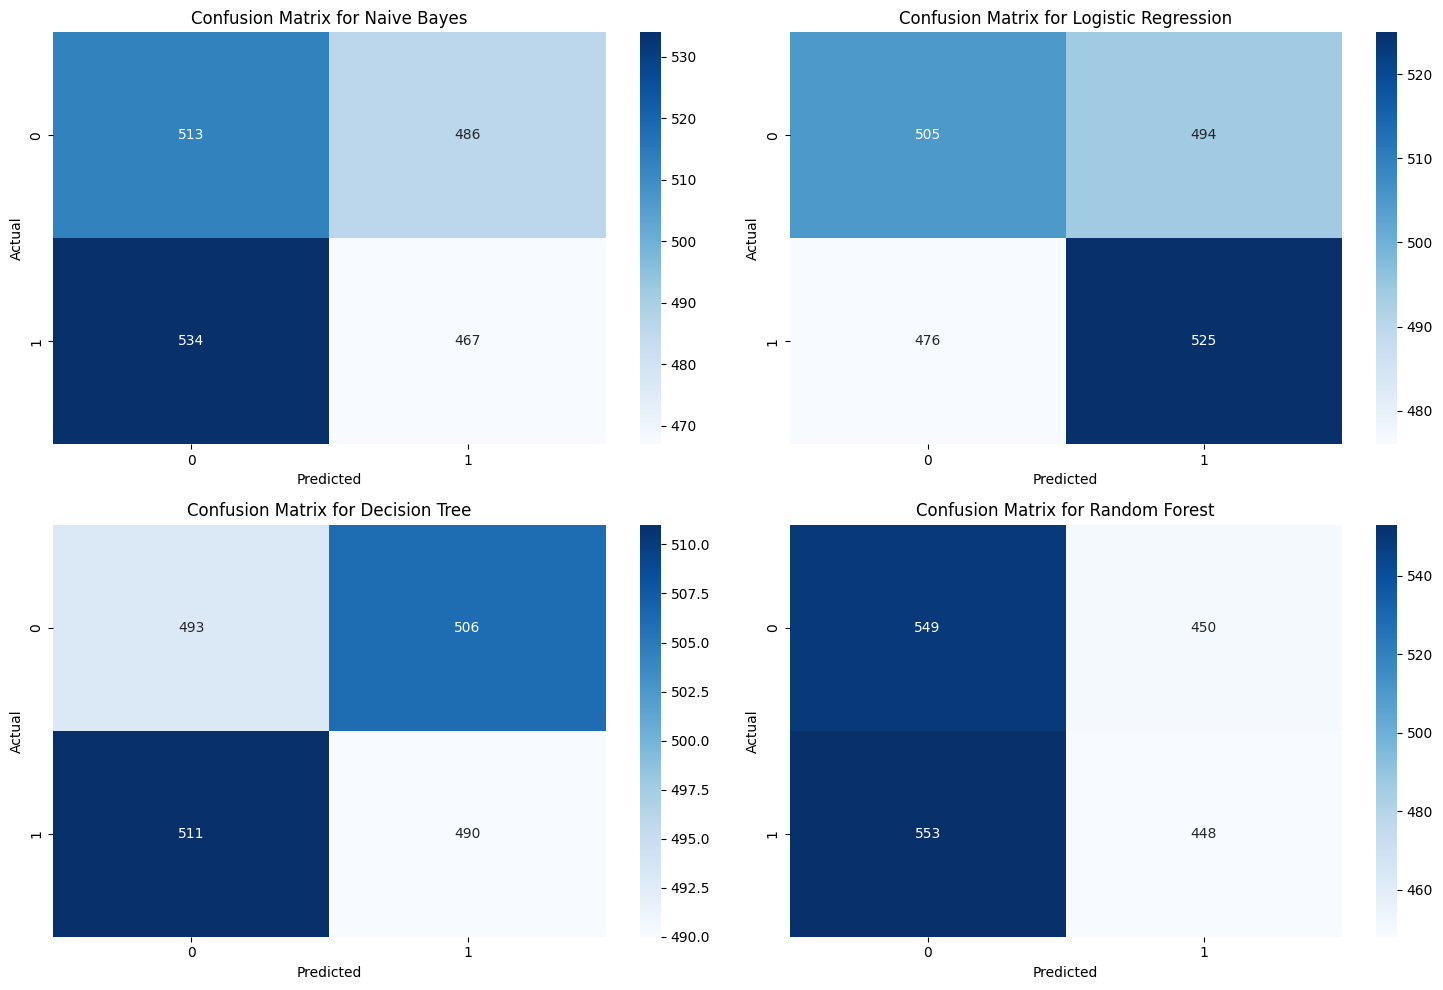

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(trained_models.items()):
    # Tahmin yap
    y_pred = model.predict(X_test)
    
    # Karmaşıklık matrisi
    cm = confusion_matrix(y_test, y_pred)
    
    # Matrisin görselleştirilmesi
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix for {model_name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()